In [ ]:
# figure style adapted from https://github.com/LucasESBS/vega-reproducibility/blob/main/plots/Figure1-Kang.ipynb

In [11]:
import numpy as np
import pandas as pd 
import anndata 
import sys
import matplotlib.pyplot as plt
import seaborn as sb

In [12]:
paths = np.loadtxt('/homes/gws/aspiro17/pace_genome_bio/path_names/haber_paths.csv',delimiter=',', dtype='str')

In [13]:
path_names = list(paths) + ['AUXILIARY']

In [14]:
ig = pd.read_csv('/homes/gws/aspiro17/pace_genome_bio/top_pathways/haber_ig.csv').set_axis(path_names)
lr = pd.read_csv('/homes/gws/aspiro17/pace_genome_bio/top_pathways/haber_lr.csv').set_axis(path_names)

In [15]:
ig['means'] = np.abs(ig).mean(1)
ig['rank']= ig['means'].rank(ascending=False)

lr['means'] = np.abs(lr).mean(1)
lr['rank']= lr['means'].rank(ascending=False)

In [16]:
ig

,0,1,2,3,4,5,6,7,8,9,means,rank
REACTOME_HEMOSTASIS,-0.000266,-0.000257,-0.000279,-0.000242,-0.000304,-0.000244,-0.000298,-0.000309,-0.000180,-0.000298,0.000268,39.0
REACTOME_NEUROTRANSMITTER_RECEPTORS_AND_POSTSYNAPTIC_SIGNAL_TRANSMISSION,-0.000063,-0.000046,-0.000058,-0.000170,-0.000072,-0.000124,-0.000110,-0.000122,-0.000108,-0.000041,0.000091,121.0
REACTOME_TRANSMISSION_ACROSS_CHEMICAL_SYNAPSES,-0.000193,-0.000186,-0.000140,-0.000107,-0.000182,-0.000213,-0.000126,-0.000190,-0.000193,-0.000117,0.000164,70.0
REACTOME_NEURONAL_SYSTEM,-0.000173,-0.000196,-0.000129,-0.000193,-0.000171,-0.000213,-0.000152,-0.000181,-0.000211,-0.000167,0.000179,61.0
REACTOME_DEVELOPMENTAL_BIOLOGY,-0.000533,-0.000527,-0.000409,-0.000630,-0.000644,-0.000687,-0.000643,-0.000586,-0.000674,-0.000667,0.000600,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
REACTOME_CLASS_I_MHC_MEDIATED_ANTIGEN_PROCESSING_PRESENTATION,-0.000203,-0.000265,-0.000254,-0.000234,-0.000139,-0.000249,-0.000271,-0.000148,-0.000246,-0.000163,0.000217,54.0
REACTOME_KINESINS,-0.000101,-0.000053,-0.000096,-0.000087,-0.000149,-0.000073,-0.000085,-0.000085,-0.000084,-0.000166,0.000098,118.0
REACTOME_FACTORS_INVOLVED_IN_MEGAKARYOCYTE_DEVELOPMENT_AND_PLATELET_PRODUCTION,-0.000069,-0.000080,-0.000100,-0.000056,-0.000100,-0.000082,-0.000058,-0.000080,-0.000059,-0.000092,0.000078,124.0
REACTOME_ION_CHANNEL_TRANSPORT,-0.000146,-0.000271,-0.000221,-0.000138,-0.000105,-0.000248,-0.000103,-0.000178,-0.000135,-0.000189,0.000173,63.0


In [17]:
compare = pd.DataFrame()
compare['path'] = path_names
compare['ig_rank'] = ig['rank'].to_list()
compare['lr_rank'] = lr['rank'].to_list()
compare['ig_mean'] = ig['means'].to_list()
compare['lr_mean'] = lr['means'].to_list()
compare['ig_rank_swapped'] = 1/compare['ig_rank']
compare['lr_rank_swapped'] = 1/compare['lr_rank']
compare = compare.drop([129])
p_sizes = np.loadtxt('/homes/gws/aspiro17/pace_genome_bio/haber_p_sizes.csv',delimiter=',', dtype='int')
compare['p_sizes'] = p_sizes

In [18]:
compare

,path,ig_rank,lr_rank,ig_mean,lr_mean,ig_rank_swapped,lr_rank_swapped,p_sizes
0,REACTOME_HEMOSTASIS,39.0,9.0,0.000268,0.604032,0.025641,0.111111,90
1,REACTOME_NEUROTRANSMITTER_RECEPTORS_AND_POSTSY...,121.0,69.0,0.000091,0.547939,0.008264,0.014493,29
2,REACTOME_TRANSMISSION_ACROSS_CHEMICAL_SYNAPSES,70.0,65.0,0.000164,0.549194,0.014286,0.015385,37
3,REACTOME_NEURONAL_SYSTEM,61.0,61.0,0.000179,0.550896,0.016393,0.016393,51
4,REACTOME_DEVELOPMENTAL_BIOLOGY,9.0,77.0,0.000600,0.545878,0.111111,0.012987,76
...,...,...,...,...,...,...,...,...
124,REACTOME_SIGNALING_BY_RHO_GTPASES_MIRO_GTPASES...,74.0,83.0,0.000157,0.544624,0.013514,0.012048,61
125,REACTOME_CLASS_I_MHC_MEDIATED_ANTIGEN_PROCESSI...,54.0,18.0,0.000217,0.584409,0.018519,0.055556,14
126,REACTOME_KINESINS,118.0,114.0,0.000098,0.541308,0.008475,0.008772,17
127,REACTOME_FACTORS_INVOLVED_IN_MEGAKARYOCYTE_DEV...,124.0,95.5,0.000078,0.542563,0.008065,0.010471,22


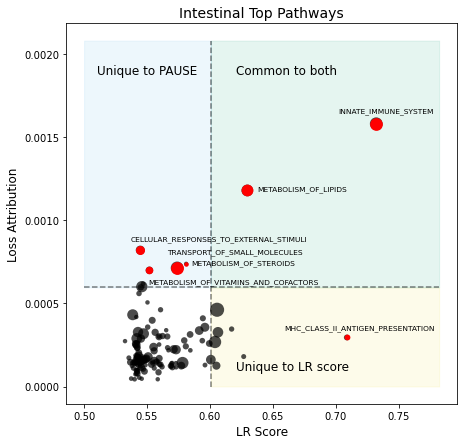

In [28]:
from matplotlib import patches
from matplotlib.lines import Line2D

yel = sb.color_palette(palette='colorblind')[8]
lb = sb.color_palette(palette='colorblind')[9]
dg = sb.color_palette(palette='colorblind')[2]

p_sizes = np.array(compare['p_sizes'])

a,b = 20,200
dot_sizes = a + ((p_sizes - np.min(p_sizes))*(b-a))/(np.max(p_sizes)-np.min(p_sizes))

ig_above = .0005
lr_above = .05 

ig_min = 0 
lr_min = .5

ig_cutoff = float(compare[compare['ig_rank'] == 10]['ig_mean'])
lr_cutoff = float(compare[compare['lr_rank'] == 10]['lr_mean'])

fig = plt.figure(figsize=[7,7])
plt.fill_between(np.linspace(lr_cutoff,np.max(compare['lr_mean'])+ lr_above, 1000) , ig_min, ig_cutoff, color=yel, alpha=0.1,
                 interpolate=True)
plt.fill_between(np.linspace(lr_cutoff,np.max(compare['lr_mean'])+ lr_above, 1000) , ig_cutoff, np.max(compare['ig_mean'])+ ig_above, color=dg, alpha=0.1,
                 interpolate=True)
plt.fill_between(np.linspace(lr_min,lr_cutoff, 1000) , ig_cutoff, np.max(compare['ig_mean'])+ ig_above, color=lb, alpha=0.1,
                 interpolate=True)

plt.scatter(compare['lr_mean'], compare['ig_mean'], s=dot_sizes, c='k', linewidth=0, alpha=0.7)

plt.hlines(xmin=lr_min, xmax=np.max(compare['lr_mean'])+lr_above, y=ig_cutoff, linestyle='--', color='k', alpha=0.5)
plt.vlines(ymin=ig_min, ymax=np.max(compare['ig_mean'])+ig_above, x=lr_cutoff, linestyle='--',color='k', alpha=0.5)

pathway_list = compare['path']

texts = []
to_text = np.arange(len(compare['ig_mean']))

included = ['INNATE_IMMUNE', 'METABOLISM_OF_LIPIDS', 'MHC_CLASS', 'EXTERNAL_STIMULI', 'STEROIDS', 'SMALL_MOLECULES', 'METABOLISM_OF_VITAMINS']

for i in to_text:
    name = pathway_list[i].split('REACTOME_')[-1]
    x = compare['lr_mean'][i]
    y = compare['ig_mean'][i]
    
    if 'METABOLISM_OF_VITAMINS' in name: 
        texts.append(plt.text(x=(x-.001), y=y-.00008, s=name, fontdict={'size':7.5}))
        plt.scatter(x,y, s=dot_sizes[i], c='r', linewidth=0)
              
    elif 'STEROIDS' in name: 
        texts.append(plt.text(x=(x+.004), y=y, s=name, fontdict={'size':7.5}))
        plt.scatter(x,y, s=dot_sizes[i], c='r', linewidth=0)
        
    elif 'SMALL_MOLECULES' in name: 
        texts.append(plt.text(x=(x-.008), y=y+.00009, s=name, fontdict={'size':7.5}))
        plt.scatter(x,y, s=dot_sizes[i], c='r', linewidth=0)
               
    elif 'EXTERNAL_STIMULI' in name: 
        texts.append(plt.text(x=(x-.008), y=y+.00006, s=name, fontdict={'size':7.5}))
        plt.scatter(x,y, s=dot_sizes[i], c='r', linewidth=0)
        
    elif 'MHC_CLASS' in name: 
        texts.append(plt.text(x=(x-.05), y=y+.00005, s=name, fontdict={'size':7.5}))
        plt.scatter(x,y, s=dot_sizes[i], c='r', linewidth=0)

        
    elif 'INNATE_IMMUNE' in name: 
        texts.append(plt.text(x=(x-.03), y=y+.00007, s=name, fontdict={'size':7.5}))
        plt.scatter(x,y, s=dot_sizes[i], c='r', linewidth=0)
    
    
    else: 
        for path in included: 
            if path in name: 
                texts.append(plt.text(x=(x+.008), y=y, s=name, fontdict={'size':7.5}))
                plt.scatter(x,y, s=dot_sizes[i], c='r', linewidth=0)

            
plt.xlabel(r'LR Score', fontsize=12)
plt.ylabel(r'Loss Attribution', fontsize=12)

plt.text(x= lr_min + .01, y=np.max(compare['ig_mean']) + 0.0003, s='Unique to PAUSE', fontdict={'size':12, 'color':'black'})
plt.text(x=lr_cutoff + .02, y=np.max(compare['ig_mean']) + 0.0003, s='Common to both', fontdict={'size':12, 'color':'black'})
plt.text(x=lr_cutoff + .02, y=0.0001, s='Unique to LR score', fontdict={'size':12, 'color':'black'})

plt.title('Intestinal Top Pathways', fontsize=14)
plt.savefig('compare_figs/haber.pdf')
